<a href="https://colab.research.google.com/github/15gsaavedra/DDDS-My-Projects/blob/main/Gabriel_Saavedra_Project_2_Finished.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title

## Problem Definition


This is a supervised regression problem with the goal of predicting house prices based on a minimal number of other house features.

## Data Collection/Sources


In [1]:
# Import library resources.
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels.api as sm

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from PIL import Image

In [2]:
# Load the provided dataset and display it.
link = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv"

homes = pd.read_csv(link)
print(homes)

            PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0     905101070           20        RL          62.0     14299   Pave   NaN   
1     905101330           90        RL          72.0     10791   Pave   NaN   
2     903454090           50        RM          50.0      9000   Pave   NaN   
3     533244030           60        FV          68.0      7379   Pave   NaN   
4     909252020           70        RL          60.0      7200   Pave   NaN   
...         ...          ...       ...           ...       ...    ...   ...   
2632  903231070           50        RM          52.0      6240   Pave   NaN   
2633  906201021           80        RL          74.0     10778   Pave   NaN   
2634  533253070          120        RL          61.0      3782   Pave   NaN   
2635  527376100           20        RL          78.0     10140   Pave   NaN   
2636  528292060           60        RL          41.0     12460   Pave   NaN   

     Lot Shape Land Contour Utilities  ... Pool Are

1. MS SubClass says int but is nominal
2. Ms Zoning has minor changes to the naming scheme
3. Lot Frontage has unexplained nulls
4. Lot Area looks good
5. Street looks good
6. Alley (3 Nominal where nan means no alley)
7. Lot Shape (4 ordinal)
8. Land Contour (4 nominal)
9. Utilities (nominal but almost uniform)
10. Lot Config (5 nominal)
11. Land Slope (3 ordinal)
12. Neighborhood (big nominal would result in many columns from one hot)
13. Condition 1 (9 nominal)
14. Condition 2 (9 nominal)
15. Bldg Type (5 nominal)
16. House Style (nominal based on split or stories. wonder if split is in positive correlation)
17. Overall Qual (ordinal 1-10 ranking)
18. Overall Cond (ordinal 1-10? no actual 10s. mostly 5s)
19. Year Built (continuous with some old houses that could explane low condition)
20. Year Remod/Add (continuous with no recent remodels)
21. Roof Style (6 nominal)
22.
23.
24.
25. Mas Venr Type (mostly null without expected None option. Drop?)
26. Mas Venr Area (weirdly high non null values given above)
27.

In [3]:
for x in homes: print(homes[x].value_counts(dropna = False))

PID
528292060    1
905101070    1
905101330    1
903454090    1
533244030    1
            ..
906412050    1
528322020    1
528290090    1
527325110    1
534126090    1
Name: count, Length: 2637, dtype: int64
MS SubClass
20     968
60     531
50     253
120    173
30     126
160    117
70     115
80     105
90      95
190     54
85      45
75      19
45      16
180     14
40       5
150      1
Name: count, dtype: int64
MS Zoning
RL         2043
RM          419
FV          123
C (all)      25
RH           23
I (all)       2
A (agr)       2
Name: count, dtype: int64
Lot Frontage
NaN      449
60.0     247
80.0     124
70.0     123
50.0     104
        ... 
150.0      1
140.0      1
200.0      1
25.0       1
195.0      1
Name: count, Length: 127, dtype: int64
Lot Area
9600     42
7200     37
6000     30
9000     26
10800    23
         ..
11198     1
6125      1
10083     1
16545     1
13132     1
Name: count, Length: 1799, dtype: int64
Street
Pave    2625
Grvl      12
Name: count, dtype: 

In [4]:
homes.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

In [5]:
homes.describe(include = 'all')

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2.637000e+03,2637.000000,2637,2188.000000,2637.000000,2637,180,2637,2637,2637,...,2637.000000,11,528,96,2637.000000,2637.000000,2637.000000,2637,2637,2637.000000
unique,NaN,NaN,7,NaN,NaN,2,2,4,4,3,...,NaN,4,4,4,NaN,NaN,NaN,10,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,2043,NaN,NaN,2625,111,1662,2365,2634,...,NaN,4,306,87,NaN,NaN,NaN,2286,2166,NaN
mean,7.141301e+08,57.349261,NaN,69.166819,10044.694729,NaN,NaN,NaN,NaN,NaN,...,2.130072,NaN,NaN,NaN,42.014031,6.243838,2007.795601,NaN,NaN,179986.230186
std,1.887527e+08,42.499091,NaN,23.356779,6742.549521,NaN,NaN,NaN,NaN,NaN,...,35.140140,NaN,NaN,NaN,393.158781,2.722093,1.306403,NaN,NaN,78309.251522
min,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,12789.000000
25%,5.284770e+08,20.000000,NaN,58.000000,7436.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN,129500.000000
50%,5.354530e+08,50.000000,NaN,68.000000,9450.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,160000.000000
75%,9.071870e+08,70.000000,NaN,80.000000,11526.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,213000.000000


In [6]:
homes.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [7]:
homes['Mo Sold'].unique()

array([ 7, 10, 12,  4,  5,  2,  6,  3, 11,  9,  8,  1])

In [8]:
homes[homes['Pool QC'].isnull() == False]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1194,532476050,80,RL,100.0,14330,Pave,NaN,IR1,Low,AllPub,...,800,Gd,GdPrv,NaN,0,1,2006,WD,Normal,260000
1442,527377030,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1555,527356020,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1584,914475020,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1690,535353050,20,RL,75.0,9532,Pave,NaN,Reg,Lvl,AllPub,...,368,TA,GdPrv,NaN,0,2,2007,WD,Normal,153000
1791,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1868,528164060,20,RL,106.0,12720,Pave,NaN,Reg,HLS,AllPub,...,144,Ex,NaN,NaN,0,2,2008,WD,Normal,615000
2178,923202220,20,RL,200.0,43500,Pave,NaN,Reg,Lvl,AllPub,...,561,TA,GdPrv,NaN,0,6,2007,WD,Normal,130000
2357,909475230,20,RL,70.0,18044,Pave,NaN,IR1,HLS,AllPub,...,228,Ex,NaN,NaN,0,8,2007,WD,Normal,315000
2393,905426150,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


## Data Cleaning


In [9]:
cont = homes[['SalePrice', 'Lot Frontage','Lot Area', 'Year Built', 'Year Remod/Add',
              'Mas Vnr Area', 'BsmtFin SF 1',
              'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
              'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
              'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
              'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
              'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold']]
cont

,SalePrice,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,115400,62.0,14299,1964,1964,0.0,513.0,144.0,348.0,1005.0,...,440.0,0,0,0,0,0,0,0,7,2007
1,90000,72.0,10791,1967,1967,0.0,0.0,0.0,0.0,0.0,...,516.0,0,0,0,0,0,0,500,10,2006
2,141000,50.0,9000,1937,1950,0.0,0.0,0.0,780.0,780.0,...,544.0,0,162,0,0,126,0,0,12,2007
3,254000,68.0,7379,2000,2000,0.0,484.0,0.0,491.0,975.0,...,592.0,280,184,0,0,0,0,0,4,2010
4,155000,60.0,7200,1936,2007,0.0,350.0,210.0,0.0,560.0,...,576.0,256,0,0,0,0,0,0,4,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,114500,52.0,6240,1934,1950,0.0,0.0,0.0,816.0,816.0,...,528.0,112,0,0,0,0,0,400,9,2006
2633,162000,74.0,10778,1990,1991,0.0,460.0,286.0,308.0,1054.0,...,462.0,114,36,0,0,0,0,0,7,2009
2634,211500,61.0,3782,1981,1981,0.0,960.0,0.0,266.0,1226.0,...,484.0,133,78,0,0,0,0,0,9,2009
2635,165000,78.0,10140,1974,1974,174.0,0.0,0.0,1064.0,1064.0,...,478.0,0,0,0,0,0,0,0,8,2009


In [10]:
cont_clean = cont.dropna()
cont_clean

,SalePrice,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,115400,62.0,14299,1964,1964,0.0,513.0,144.0,348.0,1005.0,...,440.0,0,0,0,0,0,0,0,7,2007
1,90000,72.0,10791,1967,1967,0.0,0.0,0.0,0.0,0.0,...,516.0,0,0,0,0,0,0,500,10,2006
2,141000,50.0,9000,1937,1950,0.0,0.0,0.0,780.0,780.0,...,544.0,0,162,0,0,126,0,0,12,2007
3,254000,68.0,7379,2000,2000,0.0,484.0,0.0,491.0,975.0,...,592.0,280,184,0,0,0,0,0,4,2010
4,155000,60.0,7200,1936,2007,0.0,350.0,210.0,0.0,560.0,...,576.0,256,0,0,0,0,0,0,4,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,114500,52.0,6240,1934,1950,0.0,0.0,0.0,816.0,816.0,...,528.0,112,0,0,0,0,0,400,9,2006
2633,162000,74.0,10778,1990,1991,0.0,460.0,286.0,308.0,1054.0,...,462.0,114,36,0,0,0,0,0,7,2009
2634,211500,61.0,3782,1981,1981,0.0,960.0,0.0,266.0,1226.0,...,484.0,133,78,0,0,0,0,0,9,2009
2635,165000,78.0,10140,1974,1974,174.0,0.0,0.0,1064.0,1064.0,...,478.0,0,0,0,0,0,0,0,8,2009


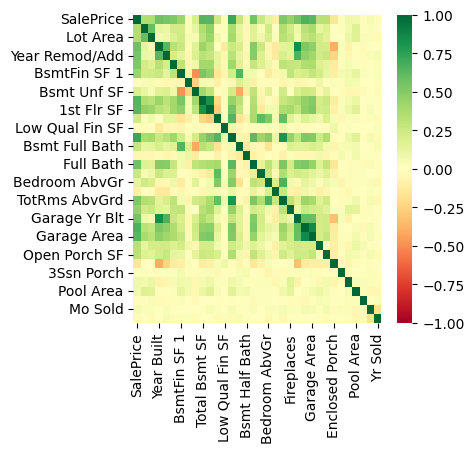

In [11]:
corr = cont_clean.corr()
plt.figure(figsize=(4,4))
sns.heatmap(corr, cmap='RdYlGn',annot = False, vmin = -1);

In [12]:
cont_clean.drop(labels = ['BsmtFin SF 2', 'Low Qual Fin SF', 'Bsmt Half Bath', 'Kitchen AbvGr', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'], axis = 1, inplace = True)

/tmp/ipython-input-12-3665679055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_clean.drop(labels = ['BsmtFin SF 2', 'Low Qual Fin SF', 'Bsmt Half Bath', 'Kitchen AbvGr', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'], axis = 1, inplace = True)


In [13]:
cont_clean.drop(labels = ['1st Flr SF', '2nd Flr SF', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Garage Cars', 'Garage Area'], axis = 1, inplace = True)

/tmp/ipython-input-13-27105048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_clean.drop(labels = ['1st Flr SF', '2nd Flr SF', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Garage Cars', 'Garage Area'], axis = 1, inplace = True)


In [14]:
cont_clean.drop(labels = ['Year Remod/Add', 'Garage Yr Blt'], axis = 1, inplace = True)

/tmp/ipython-input-14-3700807849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_clean.drop(labels = ['Year Remod/Add', 'Garage Yr Blt'], axis = 1, inplace = True)


In [15]:
cont_clean.drop(labels = ['Lot Frontage', 'Lot Area', 'BsmtFin SF 1', 'Bsmt Unf SF', 'Bsmt Full Bath', 'Half Bath', 'Fireplaces', 'Wood Deck SF', 'Open Porch SF'], axis = 1, inplace = True)

/tmp/ipython-input-15-4009827192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_clean.drop(labels = ['Lot Frontage', 'Lot Area', 'BsmtFin SF 1', 'Bsmt Unf SF', 'Bsmt Full Bath', 'Half Bath', 'Fireplaces', 'Wood Deck SF', 'Open Porch SF'], axis = 1, inplace = True)


## Exploratory Data Analysis


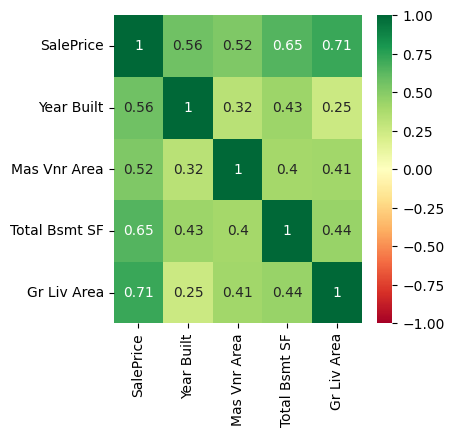

In [16]:
corr = cont_clean.corr()
plt.figure(figsize=(4,4))
sns.heatmap(corr, cmap='RdYlGn',annot = True, vmin = -1);

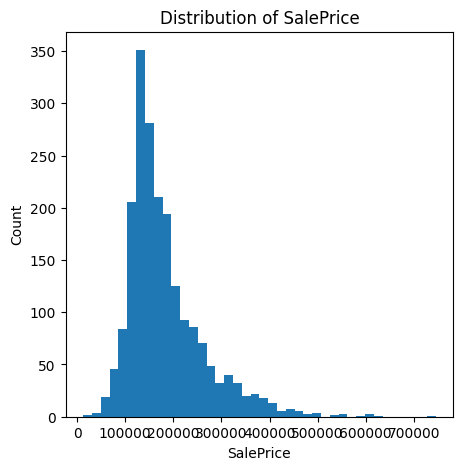

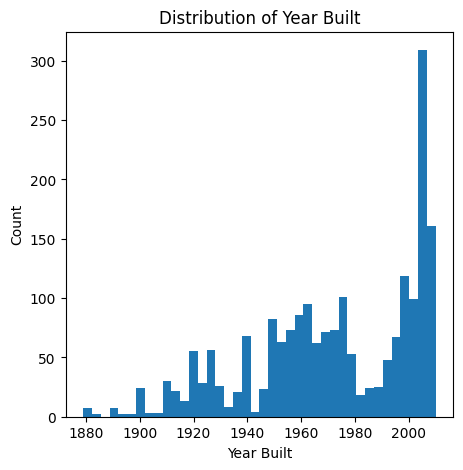

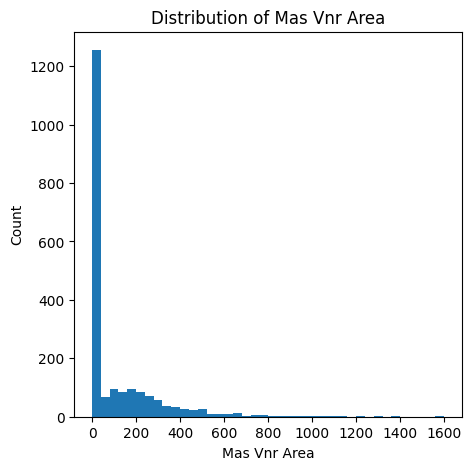

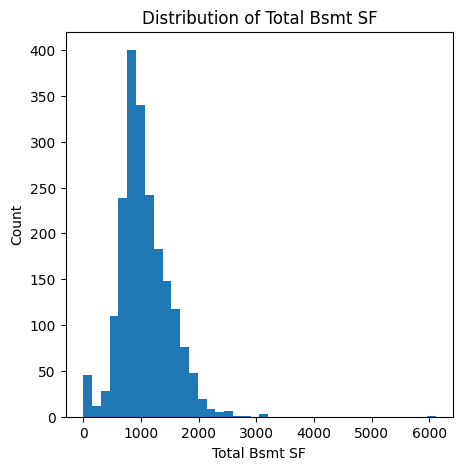

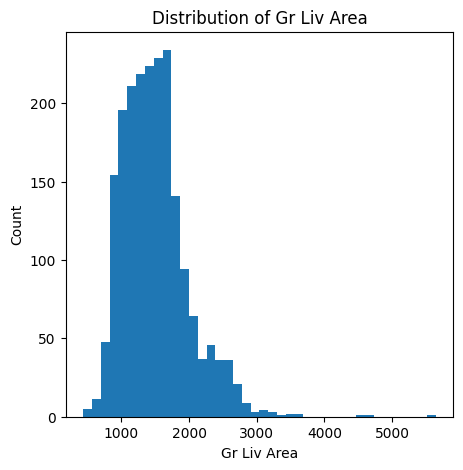

In [17]:
for i in cont_clean:
  plt.figure(figsize = (5,5));
  plt.hist(cont_clean[i], bins = 40)
  plt.xlabel(str(i))
  plt.ylabel('Count')
  plt.title(f'Distribution of {i}')
  #sns.histplot(cont_clean[i])

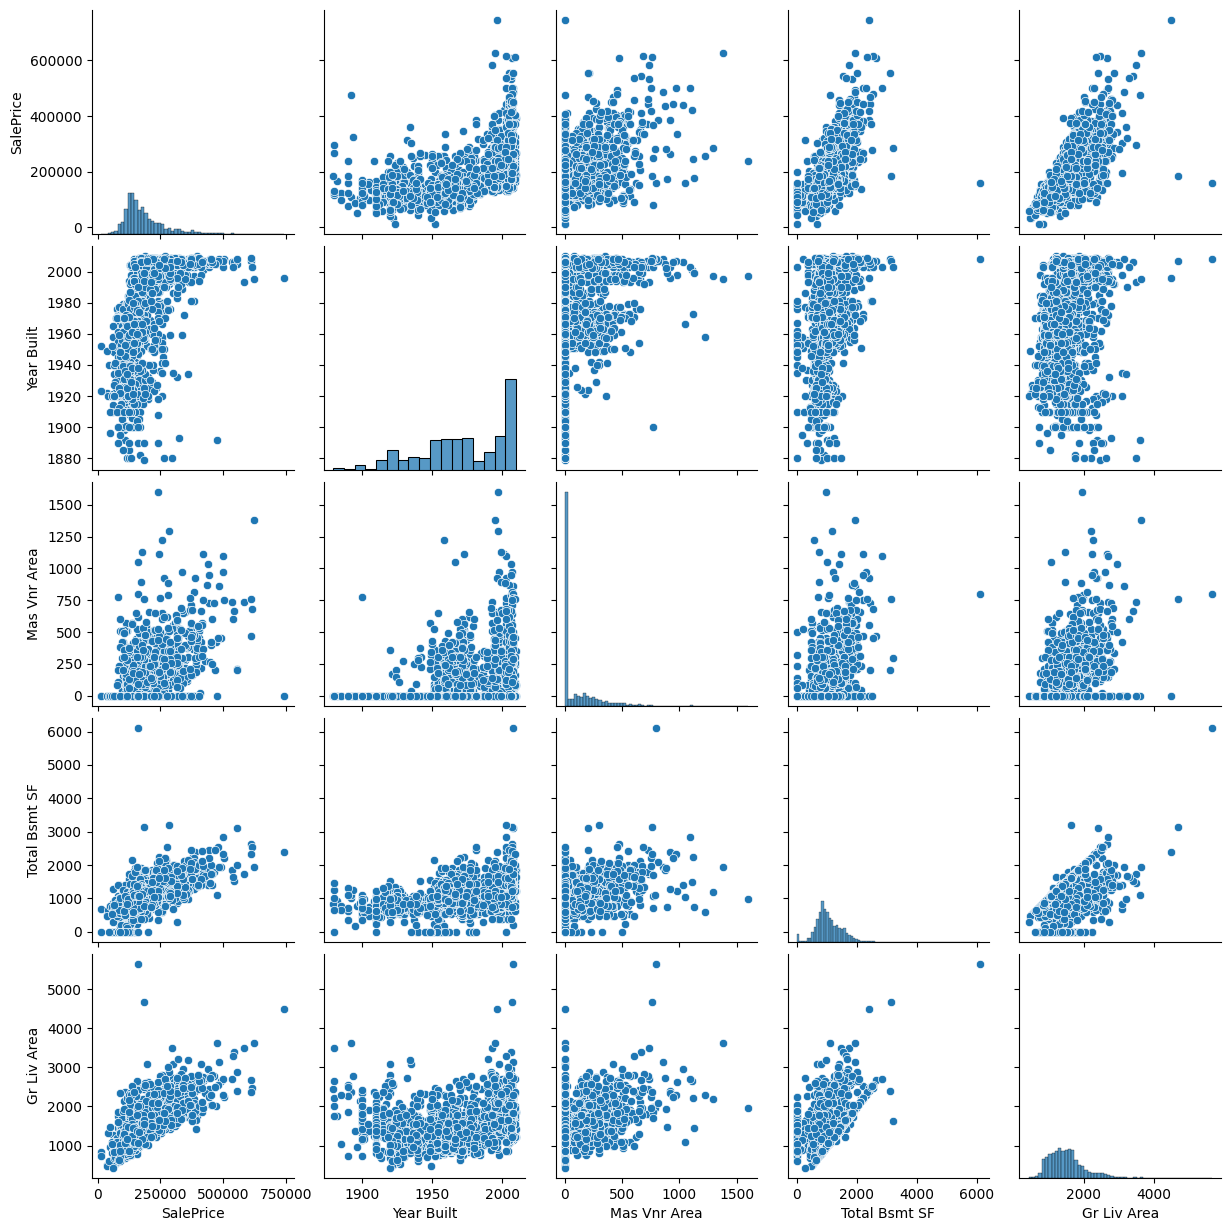

In [18]:
sns.pairplot(cont_clean)

## Processing


In [19]:
# %%capture --no-stdout
X_lasso = cont_clean.drop('SalePrice', axis = 1)
y_lasso = cont_clean['SalePrice']

# Specify values of alpha we want to try
alph = [50, 75, 100, 200, 300, 400, ]

# Create empty list to hold results
results_alpha = []

for i in alph:
  # Train the model
  my_fit_lasso = Lasso(alpha = i, tol = .01, max_iter=10_000); # Looping through alpha

  # Calculate CV RMSPE
  n = 200
  results = np.zeros(n)
  for idx in range(n):
    # Train, test split
    X_train, X_test, y_train, y_test = train_test_split(X_lasso, y_lasso, test_size=0.25)

    # Robust scale only training features
    scaler = preprocessing.RobustScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)

    # Fit regression
    my_fit_lasso.fit(X_train, y_train)

    # Scale testing features
    X_test = scaler.transform(X_test)

    # Predict
    y_pred = my_fit_lasso.predict(X_test)

    # Calculate and record performance metric
    results[idx] = np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100

  results_alpha.append(results.mean())

results_df = pd.DataFrame({'Alpha': alph, 'RMSPE': results_alpha})

results_df.sort_values( by = 'RMSPE' )

,Alpha,RMSPE
1,75,26.282362
4,300,26.847366
3,200,26.931664
5,400,27.097512
0,50,27.150728
2,100,27.657341


CV RMSPE: 27.19
Number of Predictors: 4


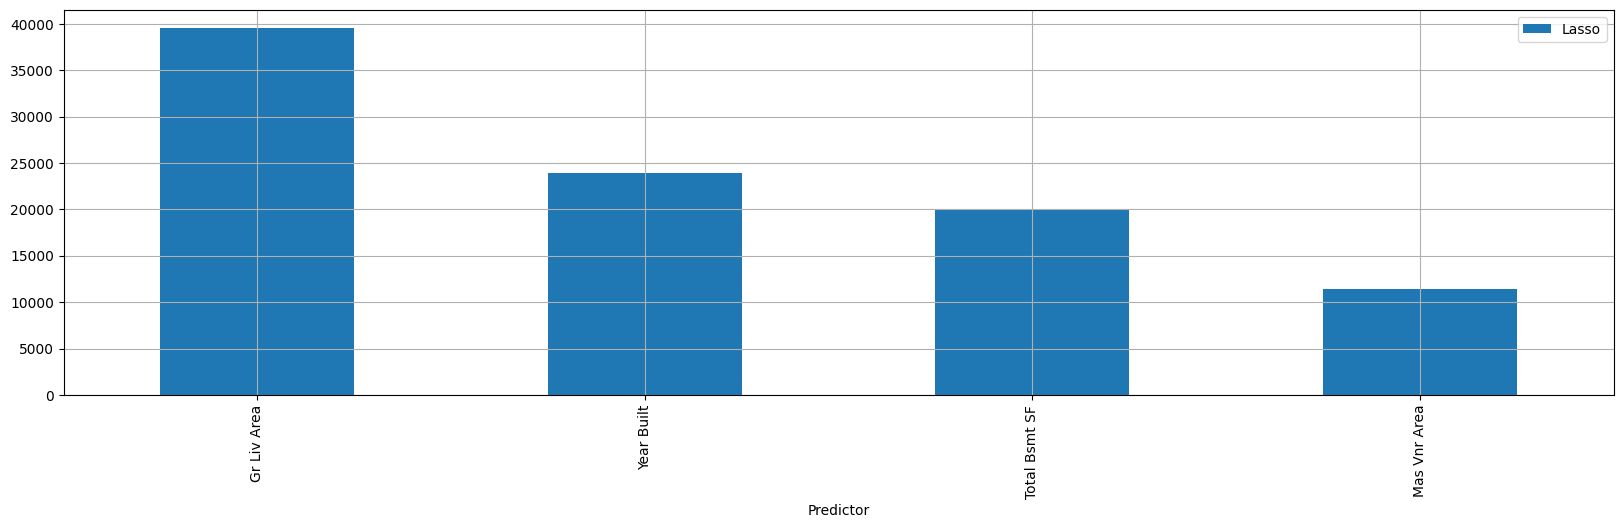

In [20]:
# %%capture --no-stdout
# Perform CV
n = 500
results = np.zeros(n)
for idx in range(n):
  X_train, X_test, y_train, y_test = train_test_split(X_lasso, y_lasso, test_size=0.25)

  # Standard scale only training features
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)

  model = Lasso(alpha = 300, tol = .01, max_iter=10000)
  model.fit(X_train, y_train)

  # Scale testing features
  X_test = scaler.transform(X_test)

  y_pred = model.predict(X_test)
  results[idx] = np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100
print(f"CV RMSPE: {results.mean().round(2)}")
print(f"Number of Predictors: {sum(model.coef_ >0)}")

# Plot model coefficients
model_results = pd.DataFrame()
model_results['Predictor'] = X_lasso.columns
model_results['Lasso'] = model.coef_
model_results.sort_values( by = ["Lasso"], ascending = False ).plot(
    x = 'Predictor',
    kind = 'bar',
    figsize = (20,5)
    )
plt.grid()

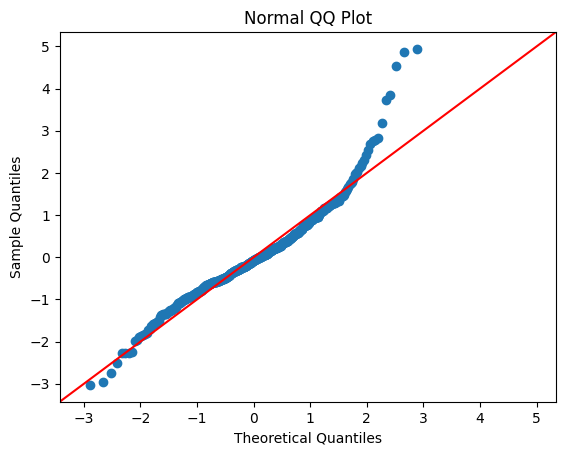

In [21]:
res = y_test - y_pred
sm.qqplot(res, fit=True, line="45");
plt.title('Normal QQ Plot');


In [22]:
# %%capture --no-stdout
X_lasso = X_lasso = cont_clean.drop(labels = ['SalePrice', 'Mas Vnr Area'], axis = 1)
y_lasso = cont_clean['SalePrice']

# Specify values of alpha we want to try
alph = [50, 75, 100, 200, 300, 400, ]

# Create empty list to hold results
results_alpha = []

for i in alph:
  # Train the model
  my_fit_lasso = Lasso(alpha = i, tol = .01, max_iter=10_000); # Looping through alpha

  # Calculate CV RMSPE
  n = 200
  results = np.zeros(n)
  for idx in range(n):
    # Train, test split
    X_train, X_test, y_train, y_test = train_test_split(X_lasso, y_lasso, test_size=0.25)

    # Robust scale only training features
    scaler = preprocessing.RobustScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)

    # Fit regression
    my_fit_lasso.fit(X_train, y_train)

    # Scale testing features
    X_test = scaler.transform(X_test)

    # Predict
    y_pred = my_fit_lasso.predict(X_test)

    # Calculate and record performance metric
    results[idx] = np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100

  results_alpha.append(results.mean())

results_df = pd.DataFrame({'Alpha': alph, 'RMSPE': results_alpha})

results_df.sort_values( by = 'RMSPE' )

,Alpha,RMSPE
0,50,26.382510
1,75,26.711998
5,400,26.914139
3,200,26.956400
2,100,27.014432
4,300,27.147544


CV RMSPE: 26.85
Number of Predictors: 3


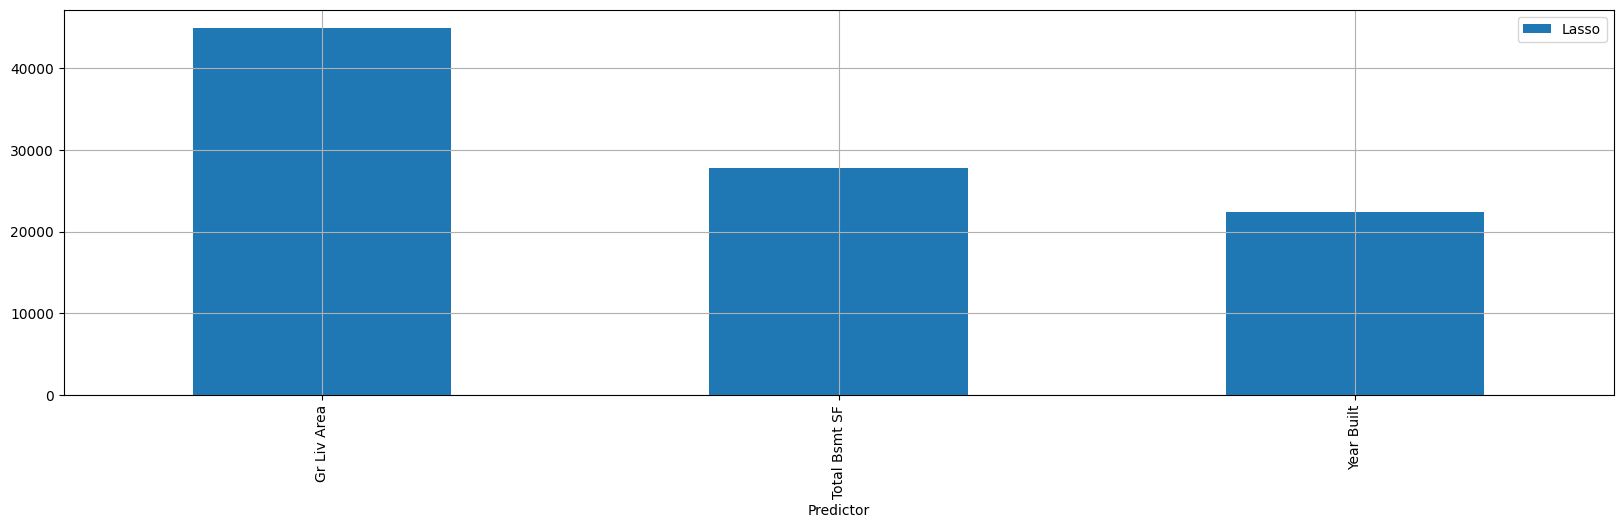

In [23]:
# %%capture --no-stdout
# Perform CV
n = 500
results = np.zeros(n)
for idx in range(n):
  X_train, X_test, y_train, y_test = train_test_split(X_lasso, y_lasso, test_size=0.25)

  # Standard scale only training features
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)

  model = Lasso(alpha = 300, tol = .01, max_iter=10000)
  model.fit(X_train, y_train)

  # Scale testing features
  X_test = scaler.transform(X_test)

  y_pred = model.predict(X_test)
  results[idx] = np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100
print(f"CV RMSPE: {results.mean().round(2)}")
print(f"Number of Predictors: {sum(model.coef_ >0)}")

# Plot model coefficients
model_results = pd.DataFrame()
model_results['Predictor'] = X_lasso.columns
model_results['Lasso'] = model.coef_
model_results.sort_values( by = ["Lasso"], ascending = False ).plot(
    x = 'Predictor',
    kind = 'bar',
    figsize = (20,5)
    )
plt.grid()

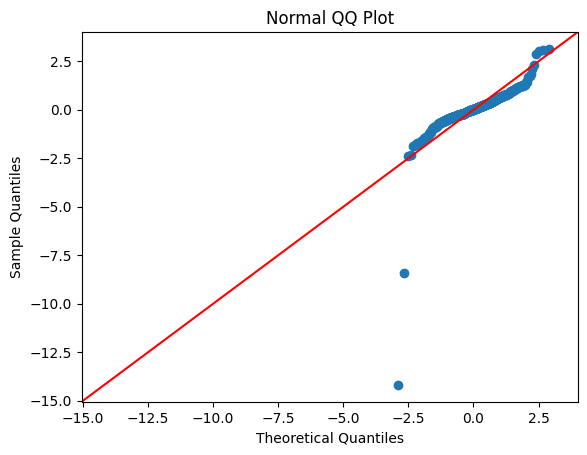

In [24]:
res = y_test - y_pred
sm.qqplot(res, fit=True, line="45");
plt.title('Normal QQ Plot');

In [25]:
# %%capture --no-stdout
X_lasso =  cont_clean.drop(labels = ['SalePrice', 'Mas Vnr Area', 'Total Bsmt SF'], axis = 1)
y_lasso = cont_clean['SalePrice']

# Specify values of alpha we want to try
alph = [50, 75, 100, 200, 300, 400, ]

# Create empty list to hold results
results_alpha = []

for i in alph:
  # Train the model
  my_fit_lasso = Lasso(alpha = i, tol = .01, max_iter=10_000); # Looping through alpha

  # Calculate CV RMSPE
  n = 200
  results = np.zeros(n)
  for idx in range(n):
    # Train, test split
    X_train, X_test, y_train, y_test = train_test_split(X_lasso, y_lasso, test_size=0.25)

    # Robust scale only training features
    scaler = preprocessing.RobustScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)

    # Fit regression
    my_fit_lasso.fit(X_train, y_train)

    # Scale testing features
    X_test = scaler.transform(X_test)

    # Predict
    y_pred = my_fit_lasso.predict(X_test)

    # Calculate and record performance metric
    results[idx] = np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100

  results_alpha.append(results.mean())

results_df = pd.DataFrame({'Alpha': alph, 'RMSPE': results_alpha})

results_df.sort_values( by = 'RMSPE' )

,Alpha,RMSPE
0,50,29.179562
3,200,29.267867
1,75,29.440619
5,400,29.532492
2,100,29.812642
4,300,29.994426


## Data Visualization/Communication of Results


We were able to predict housing prices with a RMSPE of ~27% but the resulting residuals indicate that our combination of predictor variables were not an optimal fit for lasso regression.

Our next steps would be to adjust our starting variables to include numerical representations for our nominal and ordinal data as well as trying out other regression models.